In [2]:
import pandas as pd
import sqlite3
import seaborn as sns
connection = sqlite3.connect('data/jobs.db')

In [3]:
df = pd.read_sql("""
    SELECT
        *
    FROM
        jobs    """,con=connection)
df

,job_id,job_role,job_role_ext,post_title,post_url,company_name,company_url,country,location,job_type,salary,scrape_date,posted,info_remote,post_language,description
0,4cee71852246cd98,de,data engineer,Data Engineer (Remote),https://www.indeed.com/viewjob?jk=4cee71852246...,Collins Aerospace,https://www.indeed.com/cmp/Collins-Aerospace?c...,us,"Charlotte, NC",Full-time,None,2022-04-23,Posted Just posted,"Collins Aerospace - 3,129 reviews - Charlotte,...",en,\n\n\nCollins Aerospace is continuing to grow ...
1,245d0d6e3a8680e5,de,data engineer,Senior Staff Data Engineer - 100% Remote,https://www.indeed.com/viewjob?jk=245d0d6e3a86...,Stryker,https://www.indeed.com/cmp/Stryker-3?campaigni...,us,Illinois,None,None,2022-04-23,Posted today,"Stryker - 1,808 reviews - Illinois - Remote",en,Why join Stryker?\n\nWe are proud to be named ...
2,76031179131b0858,de,data engineer,SAP Data Engineer (Remote),https://www.indeed.com/viewjob?jk=76031179131b...,Collins Aerospace,https://www.indeed.com/cmp/Collins-Aerospace?c...,us,"Charlotte, NC",Full-time,None,2022-04-23,Posted Just posted,"Collins Aerospace - 3,129 reviews - Charlotte,...",en,\n\nCollins Aerospace is continuing to grow ou...
3,04f7fde92feb9b76,de,data engineer,Azure Data Engineer,https://www.indeed.com/viewjob?jk=04f7fde92feb...,The Coca-Cola Company,https://www.indeed.com/cmp/The-Coca--cola-Comp...,us,"Atlanta, GA 30313",Full-time,None,2022-04-23,Posted Just posted,"The Coca-Cola Company - 9,868 reviews - Atlant...",en,\n\n...\n Our Purpose and Growth Culture: We a...
4,a3510f5979c22922,de,data engineer,Lead Data Engineer - High Performance Computin...,https://www.indeed.com/viewjob?jk=a3510f5979c2...,TARGET,https://www.indeed.com/cmp/Target?campaignid=m...,us,"Sunnyvale, CA 94086",Full-time,None,2022-04-23,Posted today,"TARGET - 59,853 reviews - Sunnyvale, CA 94086 ...",en,\n\nAbout us:\n As a Fortune 50 company with m...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2763,c861d60253b5bb0f,ds,data scientist,Data Scientist (3116),https://www.indeed.com/viewjob?jk=c861d60253b5...,GBG,https://www.indeed.com/cmp/Gbg-92cd3a27?campai...,my,Kuala Lumpur,Full-time,None,2022-04-27,Posted today,GBG - Kuala Lumpur,en,\n\nAbout GBG\nGBG offers a range of solutions...
2764,feeffb86d9fb487f,ds,data scientist,Data Scientist,https://www.indeed.com/viewjob?jk=feeffb86d9fb...,PV Executive Search,https://www.indeed.com/cmp/Pv-Executive-Search...,my,Petaling Jaya,Full-time,None,2022-04-27,Posted today,PV Executive Search - Petaling Jaya,en,\nBUSINESS/DATA ANALYST / DATA SCIENTIST \nREP...
2765,2246c771f5bc23ea,ds,data scientist,Data Scientist,https://www.indeed.com/viewjob?jk=2246c771f5bc...,Schlumberger,https://www.indeed.com/cmp/Schlumberger?campai...,my,Petaling Jaya,None,None,2022-04-27,Posted 1 day ago,"Schlumberger - 7,452 reviews - Petaling Jaya",en,Data Scientist\nPetaling Jaya - Malaysia\nJob ...
2766,6065cad254269599,ds,data scientist,Data Scientist,https://www.indeed.com/viewjob?jk=6065cad25426...,eBdesk Malaysia Sdn Bhd,https://www.indeed.com/cmp/Ebdesk-Malaysia-Sdn...,my,Petaling Jaya,None,None,2022-04-27,Posted 1 day ago,eBdesk Malaysia Sdn Bhd - Petaling Jaya,en,Job Description: 1. Perform various statistica...


In [7]:
from wordcloud import WordCloud
import numpy as np
from PIL import Image

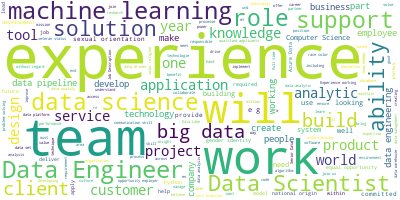

In [19]:
df = pd.read_sql("SELECT description FROM jobs",con=connection)
text_list = []
for index,row in df.iterrows():
    text_list.append(df.loc[index,'description'])
text = ' '.join(text_list)
wc = WordCloud(background_color="white").generate(text)

image = wc.to_image()
image

,company_name,posts
0,IBM,160
1,Comcentric,47
2,Shopify,43
3,"JPMorgan Chase Bank, N.A.",42
4,KPMG,41
5,EY,34
6,Deloitte,30
7,General Motors,29
8,WELLS FARGO BANK,21
9,Visa,21


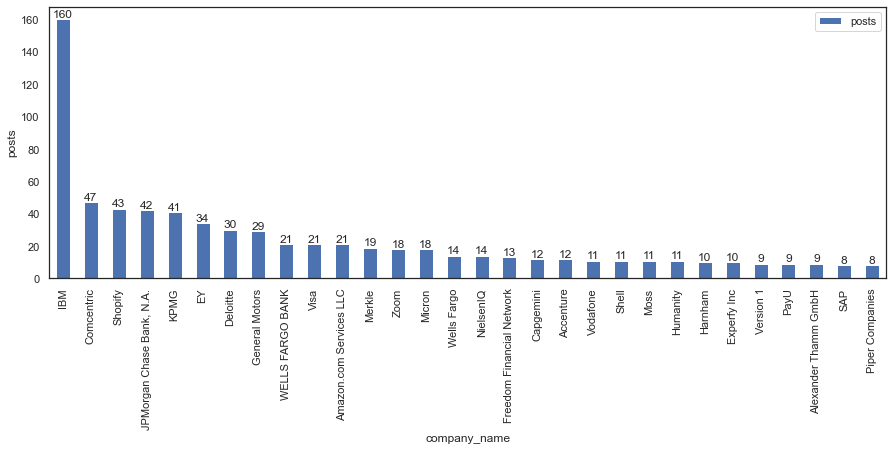

In [5]:
df = pd.read_sql("""
    SELECT
        company_name,
        COUNT(*) AS posts
    FROM
        jobs
    GROUP BY
        company_name
    ORDER BY
        COUNT(*) desc
    LIMIT
        30    """,con=connection)
sns.set_theme('notebook')
sns.set_style('white')
ax = df.plot(kind='bar', x='company_name', ylabel='posts', figsize=(15,5))
for container in ax.containers:
    ax.bar_label(container)
df

,de_posts,ds_posts
0,1798,970


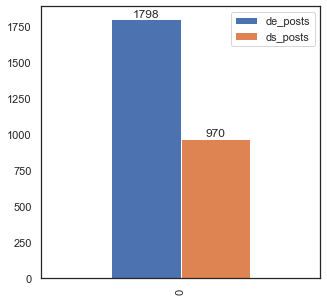

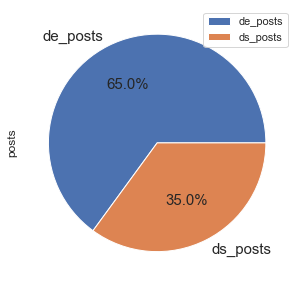

In [6]:
df = pd.read_sql("""
    SELECT
        SUM(CASE WHEN job_role='de' THEN 1 ELSE 0 END) AS de_posts,
        SUM(CASE WHEN job_role='ds' THEN 1 ELSE 0 END) AS ds_posts
    FROM
        jobs    """,con=connection)

sns.set_theme('notebook')
sns.set_style('white')

ax = df.plot(kind='bar', figsize=(5,5)) # use ax to then plot values
for container in ax.containers:
    ax.bar_label(container)
df[['de_posts','ds_posts']].T.plot(kind='pie', y=0, ylabel='posts', autopct='%1.1f%%', figsize=(5,5), fontsize=15) # Transpose and plot
df

,country,total_posts,de_posts,ds_posts
0,us,1009,648,361
1,in,446,356,90
2,uk,179,105,74
3,de,160,100,60
4,fr,133,67,66
5,ca,104,65,39
6,sg,61,32,29
7,pl,60,41,19
8,nl,52,33,19
9,au,50,42,8


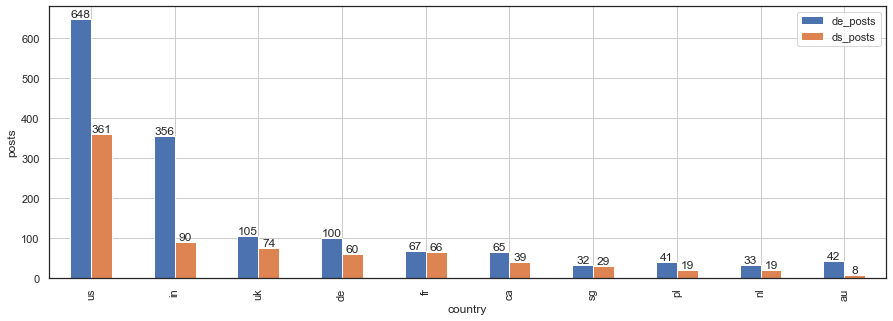

In [7]:
df = pd.read_sql("""
    SELECT
        country,
        COUNT(*) AS total_posts,
        SUM(CASE WHEN job_role='de' THEN 1 ELSE 0 END) AS de_posts,
        SUM(CASE WHEN job_role='ds' THEN 1 ELSE 0 END) AS ds_posts
    FROM
        jobs
    GROUP BY
        country
    ORDER BY
        count(*) DESC
    LIMIT
        10   """,con=connection)
sns.set_theme('notebook')
sns.set_style('white')
ax = df[['country','de_posts','ds_posts']].plot(kind='bar', x='country', figsize=(15,5), ylabel='posts', grid=True)
for container in ax.containers:
    ax.bar_label(container)
df

In [8]:
df = pd.read_sql("""
    SELECT
        scrape_date,
        COUNT(*)
    FROM
        jobs
    GROUP BY
        scrape_date
    ORDER BY
        scrape_date DESC   """,con=connection)
df

,scrape_date,COUNT(*)
0,2022-04-27,739
1,2022-04-26,696
2,2022-04-25,269
3,2022-04-24,136
4,2022-04-23,928


job_role_ext,data engineer,data scientist
sql_percentage,76.6,63.6
python_percentage,66.6,83.4
cloud_percentage,62.8,29.6
spark_percentage,44.1,27.1
airflow_percentage,15.5,2.4


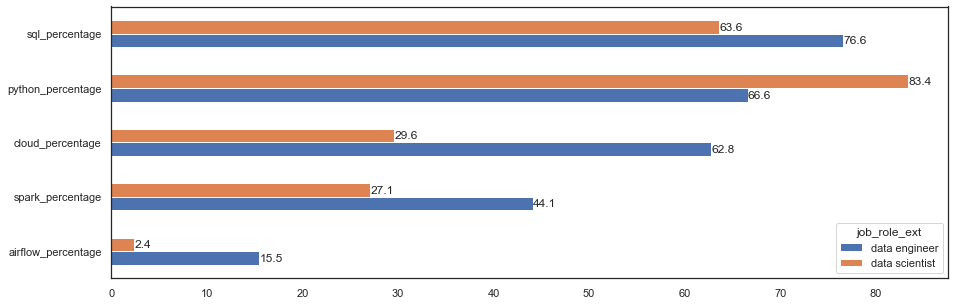

In [9]:
df = pd.read_sql("""
    SELECT
        job_role_ext,
        ROUND(SUM(CASE
            WHEN UPPER(description) LIKE '%SQL%' THEN 1
            ELSE 0
            END) / CAST(COUNT(*) AS float)*100, 1) AS sql_percentage,
        ROUND(SUM(CASE
            WHEN UPPER(description) LIKE '%PYTHON%' THEN 1
            ELSE 0
            END) / CAST(COUNT(*) AS float)*100, 1) AS python_percentage,
        ROUND(SUM(CASE
            WHEN UPPER(description) LIKE '%AIRFLOW%' THEN 1
            ELSE 0
            END) / CAST(COUNT(*) AS float)*100, 1) AS airflow_percentage,
        ROUND(SUM(CASE
            WHEN UPPER(description) LIKE '%AWS%' OR
            UPPER(description) LIKE '%GCP%' OR 
            UPPER(description) LIKE '%AZURE%' THEN 1
            ELSE 0
            END) / CAST(COUNT(*) AS float)*100, 1) AS cloud_percentage,
        ROUND(SUM(CASE
            WHEN UPPER(description) LIKE '%SPARK%' THEN 1
            ELSE 0
            END) / CAST(COUNT(*) AS float)*100, 1) AS spark_percentage
    FROM
        jobs
    GROUP BY
        job_role_ext
    ORDER BY
        2 DESC
    LIMIT
        10   """,con=connection)
sns.set_theme('notebook')
sns.set_style('white')
df = df.set_index('job_role_ext').T.sort_values(by=['data engineer'], ascending=False) # Transpose to graph better
ax = df.sort_values(by=['data engineer']).plot(kind='barh', figsize=(15,5)) # sort back and print
for container in ax.containers:
    ax.bar_label(container)
df

In [10]:
connection.close()

wordcloud!!! and graphs. world map